In [24]:
%pip install matplotlib --quiet

Note: you may need to restart the kernel to use updated packages.


In [25]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc
import numpy as np
import pickle
import shutil
import random
import os

In [26]:
# %matplotlib tk
%matplotlib inline

In [27]:
shutil.rmtree('criacao_base', ignore_errors=True)
os.makedirs('criacao_base', exist_ok=True)

In [28]:
tamanho = (10000, 10000)
ponto_inicial_final = (0, 0), tamanho
raio_size = 100
visual_s = 5
qtd_centroides = 1000
paciencia = 10

In [29]:
def posicoes_circulos(x, y, raio_size):
    valor_baixo = (x, y - raio_size)
    valor_cima = (x, y + raio_size)
    valor_esquerda = (x - raio_size, y)
    valor_direita = (x + raio_size, y)
    return valor_baixo, valor_cima, valor_esquerda, valor_direita

In [30]:
def salvar_fig_ax(fig, ax, caminho='criacao_base/'):
    with open(f"{caminho}.pkl", "wb") as f:
        pickle.dump((fig, ax), f)

def abrir_fig_ax(caminho='criacao_base/'):
    with open(f"{caminho}.pkl", "rb") as f:
        fig, ax = pickle.load(f)
    return fig, ax

In [31]:
def exibir_figura(figura, wait=False, pause=False, save=False, show=False):
    if wait:
        plt.waitforbuttonpress()
    if pause:
        plt.pause(0.001)
    if show:
        figura.show()
    if save:
        figura.savefig("criacao_basefigura.png")

def inserir_circulo_img(ax, x, y, raio_size, visual_s, color_centro, color_ext):
    posicoes = posicoes_circulos(x, y, raio_size)
    valores_adicionados = []
    [valores_adicionados.append(ax.scatter(*posicao, color=color_ext, s=visual_s)) for posicao in posicoes]
    valores_adicionados.append(ax.scatter(x, y, color=color_centro, s=visual_s))
    valores_adicionados.append(plt.Circle((x, y), raio_size, color=color_ext, fill=False))
    ax.add_patch(valores_adicionados[-1])
    return valores_adicionados, posicoes

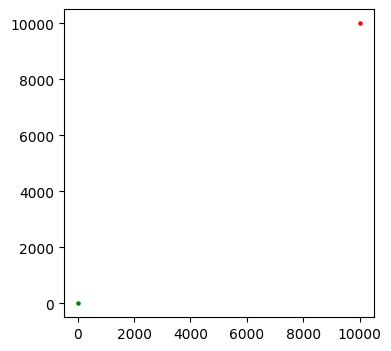

In [32]:
fig, ax = plt.subplots(figsize=(4, 4), dpi=100)
ax.scatter(*ponto_inicial_final[0], color='green', s=visual_s)
ax.scatter(*ponto_inicial_final[1], color='red', s=visual_s);
salvar_fig_ax(fig, ax)

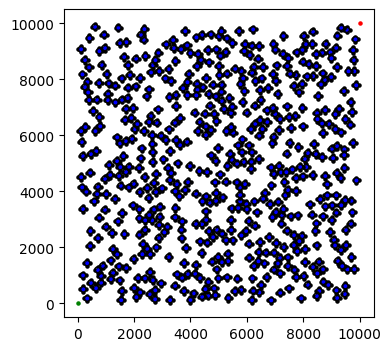

In [33]:
fig, ax = abrir_fig_ax()

centroids = []
posicoes_centroides = []

interacao_atual = 0
paciencia_atual = 0

def distancia_euclidiana(ponto1, ponto2):
    x1, y1 = ponto1
    x2, y2 = ponto2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def verificar_distancia(x1, y1, x2, y2, raio_size) -> bool:
    return distancia_euclidiana((x1, y1), (x2, y2)) < 2 * raio_size

while len(centroids) < qtd_centroides and paciencia_atual < paciencia:

    interacao_atual += 1
    paciencia_atual += 1
    
    x = random.randint(raio_size, tamanho[0] - raio_size)
    y = random.randint(raio_size, tamanho[1] - raio_size)

    if verificar_distancia(x, y, *ponto_inicial_final[0], raio_size):
        # print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto inicial.')
        ...
    elif verificar_distancia(x, y, *ponto_inicial_final[1], raio_size):
        # print(f'Ponto ({x}, {y}) está dentro da área de influência do ponto final.')
        ...
    elif any(verificar_distancia(centroid[0], centroid[1], x, y, raio_size) for centroid in centroids):
        # print(f'Ponto ({x}, {y}) está dentro da área de influência de um dos centroides já criados.')
        ...
    else:
        _, posicao_circulo = inserir_circulo_img(ax, x, y, raio_size, visual_s, 'blue', 'black')
        centroids.append((x, y))
        posicoes_centroides.append(posicao_circulo)
        paciencia_atual = 0
    
salvar_fig_ax(fig, ax)

In [34]:
paciencia_atual

10

In [35]:
def coeficientes_reta(ponto_inicial, ponto_final):
    """
    Calcula os coeficientes da equação da reta que passa pelos pontos iniciais e finais.
    a -> coeficiente angular (inclinação)
    b -> coeficiente linear (intercepto)
    c -> termo constante

    link do exemplo: https://www.todamateria.com.br/equacao-da-reta/
    link da video aula: https://www.youtube.com/watch?v=9dhtGUPgekw

    é possivel transformar a equação da reta na forma y = mx + b, onde m é o coeficiente angular e b é o coeficiente linear.
    
    p1 = (-1, 8)
    p2 = (-5, -1)

    exemplo: 
    a = 9
    b = -4
    c = 41
    """
    
    a = (ponto_inicial[1] - ponto_final[1])
    b = (ponto_final[0] - ponto_inicial[0])
    c = (ponto_final[1] * ponto_inicial[0]) - (ponto_final[0] * ponto_inicial[1])
    return a, b, c

A = (0, 0)
B = (1, 1)
a, b, c = coeficientes_reta(A, B)


print(f"Coeficientes da reta entre {A} e {B}: a = {a}, b = {b}, c = {c}")
print(f"Equação da reta: {a}x + {b}y + {c} = 0")
print(f"Forma reduzida: y = {-a/b}x + {-c/b}")

Coeficientes da reta entre (0, 0) e (1, 1): a = -1, b = 1, c = 0
Equação da reta: -1x + 1y + 0 = 0
Forma reduzida: y = 1.0x + 0.0


In [36]:
def distancia_ponto_reta(novo_ponto, a, b, c):
    """
    Calcula a distância do ponto (novo_ponto) à reta definida pelos coeficientes a, b e c.
    A fórmula é dada por: |ax + by + c| / sqrt(a^2 + b^2)

    Link exemplo: https://www.todamateria.com.br/distancia-entre-dois-pontos/
    Link video aula: https://www.youtube.com/watch?v=FSfwY1fM4EI
    
    Por que não usar a formula: 
    '
    distancia_x = x2 - x1
    distancia_y = y2 - y1
    distancia_euclidiana = (distancia_x ** 2 + distancia_y ** 2) ** 0.5
    '

    Motivo: 
    A fórmula da distância entre dois pontos é uma medida direta da distância euclidiana, 
    que é a mais comum em um espaço cartesiano. No entanto, quando se trata de calcular a distância de um ponto a uma linha,
    a fórmula da linha é mais apropriada, pois leva em consideração a inclinação da linha e a posição do ponto em relação a ela.
    
    Falando de forma informal: 
    Eles medem coisas diferentes. A distância ponto-reta nunca vai ser a mesma que a distância entre dois pontos específicos, porque:
    Uma compara ponto com ponto, A outra compara ponto com linha infinita.

    """
    divisor = ((a**2 + b**2) ** 0.5)
    if divisor == 0:
        raise ZeroDivisionError("Não é uma reta válida, mas sim o plano inteiro ou um conjunto vazio logo não é possível calcular a distância.")
    return abs(a * novo_ponto[0] + b * novo_ponto[1] + c) / divisor

print(f"Distancia usando {distancia_ponto_reta((2, 2), *coeficientes_reta(A, B))}")

Distancia usando 0.0


In [37]:
def projecao_no_segmento(p: tuple[int, int], a: int, b: int, c: int, p1: tuple[int, int], p2: tuple[int, int]) -> tuple[float, float] | None:
    """
    Retorna a projeção ortogonal do ponto p sobre a reta definida por (a, b, c),
    mas somente se a projeção cair dentro do segmento [p1, p2].
    Caso contrário, retorna None.
    
    link aula: https://www.youtube.com/watch?v=fem35PVZjeA
    link solução:  https://en.wikipedia.org/wiki/Distance_from_a_point_to_a_line
    

    oque é o denominador?
    O denominador é a soma dos quadrados dos coeficientes a e b da reta.
    Ele é usado para calcular as coordenadas da projeção ortogonal do ponto p na reta.
    Se o denominador for zero, significa que a reta é vertical (ou seja, a = 0 e b = 0), e a projeção não pode ser calculada.
    
    Falando de forma leiga:
    Estamos trabalhando com sombras, onde a reta é a superfície e o ponto p é a fonte de luz. A projeção ortogonal é a "sombra" do ponto p na reta.
    Isso significa que estamos tentando encontrar o ponto na reta que está diretamente abaixo do ponto p, como se estivéssemos projetando a luz do ponto p na reta.
    """
    x, y = p
    denominador = a*a + b*b
    if denominador == 0:
        raise ValueError("Coeficientes inválidos para reta.")

    px = (b * (b*x - a*y) - a*c) / denominador
    py = (a * (-b*x + a*y) - b*c) / denominador

    # Verifica se a projeção está dentro do segmento
    min_x, max_x = min(p1[0], p2[0]), max(p1[0], p2[0])
    min_y, max_y = min(p1[1], p2[1]), max(p1[1], p2[1])

    if abs(px - x) < 1e-9 and abs(py - y) < 1e-9:
        return None

    if min_x <= px <= max_x and min_y <= py <= max_y:
        return px, py
    return None


In [38]:
def reta_entre_dois_pontos(centroids: list[tuple], novo_ponto: tuple[int, int], novo_destino: tuple[int, int]):
  """
  Verifica se é possivel ter uma reta entre dois pontos sem que um centróide a intercepte.

  """
  a, b, c = coeficientes_reta(novo_ponto, novo_destino)
  for centroid in centroids:
    
    try:
      distancia = distancia_ponto_reta(centroid, a, b, c)
    except ZeroDivisionError:
      return False
    
    if distancia < raio_size:
        if (centroid[0] - novo_ponto[0]) * (novo_destino[1] - novo_ponto[1]) == (centroid[1] - novo_ponto[1]) * (novo_destino[0] - novo_ponto[0]):
            # print("Centróide está na reta")
            return False

        if projecao_no_segmento(centroid, a, b, c, novo_ponto, novo_destino):
            # print("Centróide está na projeção da reta")
            return False

  return True

In [39]:
retas = []

todos_pontos = [ponto_inicial_final[0]]
for x in range(len(posicoes_centroides)):
    for y in range(len(posicoes_centroides[x])):
        todos_pontos.append(posicoes_centroides[x][y])
todos_pontos.append(ponto_inicial_final[1])

for i in range(len(todos_pontos)):
    for j in range(i+1, len(todos_pontos)):
        if reta_entre_dois_pontos(centroids, todos_pontos[i], todos_pontos[j]):
            retas.append((todos_pontos[i], todos_pontos[j]))

In [40]:
posicoes_centroides

[((2771, 3880), (2771, 4080), (2671, 3980), (2871, 3980)),
 ((6253, 1232), (6253, 1432), (6153, 1332), (6353, 1332)),
 ((7968, 7738), (7968, 7938), (7868, 7838), (8068, 7838)),
 ((8909, 6312), (8909, 6512), (8809, 6412), (9009, 6412)),
 ((2366, 9695), (2366, 9895), (2266, 9795), (2466, 9795)),
 ((8994, 7987), (8994, 8187), (8894, 8087), (9094, 8087)),
 ((4517, 6674), (4517, 6874), (4417, 6774), (4617, 6774)),
 ((1706, 4596), (1706, 4796), (1606, 4696), (1806, 4696)),
 ((2572, 1652), (2572, 1852), (2472, 1752), (2672, 1752)),
 ((5458, 3290), (5458, 3490), (5358, 3390), (5558, 3390)),
 ((6289, 2671), (6289, 2871), (6189, 2771), (6389, 2771)),
 ((198, 400), (198, 600), (98, 500), (298, 500)),
 ((6512, 556), (6512, 756), (6412, 656), (6612, 656)),
 ((5384, 7237), (5384, 7437), (5284, 7337), (5484, 7337)),
 ((4839, 434), (4839, 634), (4739, 534), (4939, 534)),
 ((676, 7172), (676, 7372), (576, 7272), (776, 7272)),
 ((6912, 5616), (6912, 5816), (6812, 5716), (7012, 5716)),
 ((1559, 7931), (1

Total de pontos: 2330
Total de retas criadas: 20721


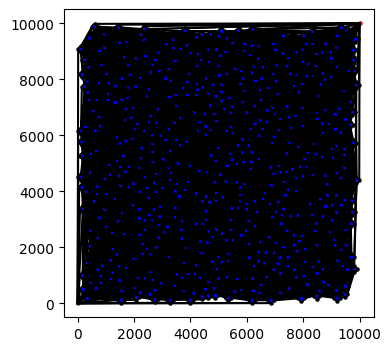

In [41]:
fig, ax = abrir_fig_ax()

retas_desenhadas = []
for reta in retas:
    retas_desenhadas.append(ax.plot(*zip(*reta), color='black'))

print(f"Total de pontos: {len(todos_pontos)}")
print(f"Total de retas criadas: {len(retas)}")

salvar_fig_ax(fig, ax)

In [42]:
for (cima, baixo, esq, dir) in posicoes_centroides:
    retas.append((cima, esq))
    retas.append((cima, dir))
    retas.append((baixo, esq))
    retas.append((baixo, dir))
retas

[((0, 0), (198, 400)),
 ((0, 0), (98, 500)),
 ((0, 0), (54, 4139)),
 ((0, 0), (542, 542)),
 ((0, 0), (6865, 5)),
 ((0, 0), (818, 885)),
 ((0, 0), (21, 4509)),
 ((0, 0), (462, 630)),
 ((0, 0), (182, 3270)),
 ((0, 0), (82, 3370)),
 ((0, 0), (18, 6156)),
 ((0, 0), (6179, 11)),
 ((0, 0), (1543, 16)),
 ((0, 0), (1443, 116)),
 ((0, 0), (17, 9073)),
 ((0, 0), (2109, 386)),
 ((0, 0), (335, 71)),
 ((0, 0), (235, 171)),
 ((0, 0), (3275, 19)),
 ((0, 0), (81, 994)),
 ((2771, 3880), (1327, 3833)),
 ((2771, 3880), (6062, 3039)),
 ((2771, 3880), (4603, 2268)),
 ((2771, 3880), (1656, 2573)),
 ((2771, 3880), (2190, 3133)),
 ((2771, 3880), (2290, 3033)),
 ((2771, 3880), (3467, 3510)),
 ((2771, 3880), (3367, 3410)),
 ((2771, 3880), (2540, 3259)),
 ((2771, 3880), (2702, 3452)),
 ((2771, 3880), (3582, 2631)),
 ((2771, 3880), (2515, 3862)),
 ((2771, 3880), (2615, 3762)),
 ((2771, 3880), (3512, 3816)),
 ((2771, 3880), (3706, 3022)),
 ((2771, 3880), (2915, 3552)),
 ((2771, 3880), (2815, 3452)),
 ((2771, 3880)

In [43]:
pontos_unicos = {}
for reta in retas:
  pontos_unicos.setdefault(reta[0], set()).add(reta[1])
  
for key, value in pontos_unicos.items():
  print(f"Reta: {key}, Pontos: {value}")

Reta: (0, 0), Pontos: {(2109, 386), (818, 885), (1443, 116), (81, 994), (17, 9073), (335, 71), (182, 3270), (98, 500), (462, 630), (21, 4509), (1543, 16), (3275, 19), (54, 4139), (6179, 11), (198, 400), (18, 6156), (235, 171), (542, 542), (82, 3370), (6865, 5)}
Reta: (2771, 3880), Pontos: {(3456, 3168), (2915, 3552), (2290, 3033), (2515, 3862), (3367, 3410), (2815, 3452), (6062, 3039), (3356, 3068), (4557, 3084), (2540, 3259), (3512, 3816), (3706, 3022), (2289, 3354), (2615, 3762), (1327, 3833), (4543, 3381), (7131, 2844), (2671, 3980), (4443, 3281), (2702, 3452), (2871, 3980), (4603, 2268), (2190, 3133), (5448, 2723), (3582, 2631), (3689, 2415), (1656, 2573), (5870, 2580), (3467, 3510)}
Reta: (2771, 4080), Pontos: {(2893, 4105), (2373, 4407), (3204, 4728), (3209, 4654), (3104, 4828), (3039, 5042), (3286, 5341), (1806, 4696), (2671, 3980), (3175, 4406), (2565, 4119), (2702, 4195), (1819, 4784), (2871, 3980)}
Reta: (2671, 3980), Pontos: {(1061, 3343), (865, 3060), (2296, 3979), (2266, 5

In [44]:
ponto_inicial = ponto_inicial_final[0]
ponto_final = ponto_inicial_final[1]
possibilidade_atual = pontos_unicos[ponto_inicial]

def encontrar_possibilidades(ponto_atual, ponto_final, pilha=[]):
    pilha.append(ponto_atual)
    if ponto_atual == ponto_final:
        return True
    for prox_ponto in pontos_unicos.get(ponto_atual, []):
        if encontrar_possibilidades(prox_ponto, ponto_final, pilha):
            return True
    pilha.pop()
    return False

pilha = []
encontrar_possibilidades(ponto_inicial, ponto_final, pilha)

True

In [45]:
def ponto_mesmo_centroid(ponto1, ponto2, centroids, raio_size):
    """
    Verifica se ambos os pontos pertencem ao mesmo centróide.
    """
    centroid_ponto1 = None
    centroid_ponto2 = None
    
    for i, centroid in enumerate(centroids):
        if distancia_euclidiana(ponto1, centroid) <= raio_size:
            centroid_ponto1 = i
            break
    
    for i, centroid in enumerate(centroids):
        if distancia_euclidiana(ponto2, centroid) <= raio_size:
            centroid_ponto2 = i
            break
    
    mesmo = centroid_ponto1 is not None and centroid_ponto1 == centroid_ponto2
    if not mesmo:
        return False, None, None
    return mesmo, centroids[centroid_ponto1], centroids[centroid_ponto2]

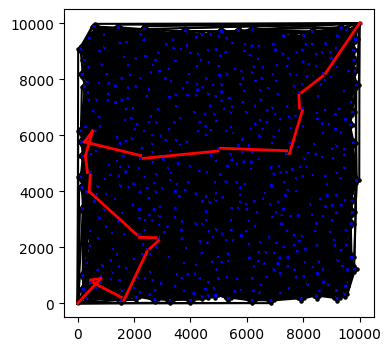

In [46]:
fig, ax = abrir_fig_ax()
for i in range(len(pilha) - 1):
    ponto1 = pilha[i]
    ponto2 = pilha[i + 1]

    mesmo_centro, centroid, _ = ponto_mesmo_centroid(ponto1, ponto2, centroids, raio_size)
    if mesmo_centro:
        angulo1 = np.degrees(np.arctan2(ponto1[1] - centroid[1], ponto1[0] - centroid[0]))
        angulo2 = np.degrees(np.arctan2(ponto2[1] - centroid[1], ponto2[0] - centroid[0]))
        arco = Arc(centroid, width=2*raio_size, height=2*raio_size, theta1=angulo1, theta2=angulo2, color="green", linewidth=2)
        ax.add_patch(arco)
    else:
        ax.plot([ponto1[0], ponto2[0]], [ponto1[1], ponto2[1]], color='red', linewidth=2)